<a href="https://colab.research.google.com/github/hanafimajid/tpot-mtr/blob/main/andro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=851970cf71c52b5deb2dc7ca07e79397c7553730a5807e5f0221172b1fffe1af
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()


Saving csv_result-andro.csv to csv_result-andro.csv


In [ ]:
import pandas as pd
df = pd.read_csv("csv_result-andro.csv")
df.head()
y_col = [
'Target',
'Target_2',
'Target_3',
'Target_4',
'Target_5',
'Target_6'
# 'Y4',
# 'Y5',
# 'Y6'
]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()


,Target,Target_2,Target_3,Target_4,Target_5,Target_6
0,15.17,5.14,46.0,30.4,46.8,3.74
1,14.85,5.11,47.0,31.2,46.8,3.78
2,14.72,5.10,48.0,31.7,42.7,3.40
3,15.28,5.11,48.0,32.0,42.5,3.38
4,16.15,5.13,47.0,30.8,42.1,3.27


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))

# Choose a transformer for the target variable (e.g., StandardScaler)
target_transformer = scaler



In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
#rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg = MultiOutputRegressor(TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10, scoring='neg_mean_squared_error'))
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=rfg, transformer=target_transformer)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)




Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.006312051905788181

Generation 2 - Current best internal CV score: -0.006312051905788181

Generation 3 - Current best internal CV score: -0.0056896809511486676

Generation 4 - Current best internal CV score: -0.005563671891380452

Generation 5 - Current best internal CV score: -0.005563671891380452

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.6000000000000001, min_samples_leaf=2, min_samples_split=4, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.018035055708879727

Generation 2 - Current best internal CV score: -0.014112762161250564

Generation 3 - Current best internal CV score: -0.014112762161250564

Generation 4 - Current best internal CV score: -0.013753394705133048

Generation 5 - Current best internal CV score: -0.00040365522084226103

Best pipeline: DecisionTreeRegressor(input_matrix, max_depth=5, min_samples_leaf=4, min_samples_split=13)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.013241879094737011

Generation 2 - Current best internal CV score: -0.012194333781606706

Generation 3 - Current best internal CV score: -0.012194333781606706

Generation 4 - Current best internal CV score: -0.012194333781606706

Generation 5 - Current best internal CV score: -0.009709731870633764

Best pipeline: AdaBoostRegressor(RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.55, min_samples_leaf=6, min_samples_split=4, n_estimators=100), learning_rate=1.0, loss=square, n_estimators=100)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 1668, in fit
    mse_paths = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  Fi

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.014162442372891612

Generation 2 - Current best internal CV score: -0.014162442372891612

Generation 3 - Current best internal CV score: -0.014162442372891612

Generation 4 - Current best internal CV score: -0.013480337337932111

Generation 5 - Current best internal CV score: -0.01254908068326947

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=2, min_samples_split=4, n_estimators=100)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 1668, in fit
    mse_paths = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  Fi

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.022721852230625776


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 1668, in fit
    mse_paths = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  Fi


Generation 2 - Current best internal CV score: -0.022721852230625776

Generation 3 - Current best internal CV score: -0.020758731230143785

Generation 4 - Current best internal CV score: -0.02006727609257057

Generation 5 - Current best internal CV score: -0.019883828874356402

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=2, min_samples_split=6, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.01980265603526882

Generation 2 - Current best internal CV score: -0.01980265603526882

Generation 3 - Current best internal CV score: -0.015975785845629642

Generation 4 - Current best internal CV score: -0.015975785845629642

Generation 5 - Current best internal CV score: -0.015975785845629642

Best pipeline: RandomForestRegressor(MinMaxScaler(input_matrix), bootstrap=False, max_features=0.2, min_samples_leaf=2, min_samples_split=3, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.6891793759197712

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse1=math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE  is',rmse1)
mae1=mean_absolute_error(y_test, y_pred)
print('MAE is',mae1)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

RMSE  is 8.270340491021564
MAE is 3.3542754562104578
rmse_per_output: [ 1.1274195   0.04329353  1.46969266  0.90642838 20.11700895  1.2010761 ]
arrmse = 0.01268244456617214
Percentage arrmse = 1.27%


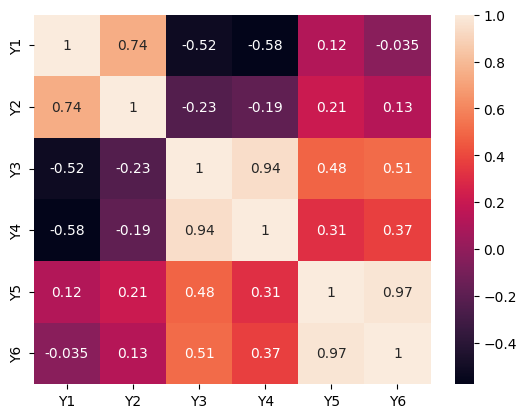

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3','Y4','Y5','Y6']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=100000000)
chain = RegressorChain(base_estimator=reg, order=[0,1,2,3,4,5]).fit(X_train, y_train)
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=chain, transformer=target_transformer)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
model.score(X_test, y_test)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

0.3648415202242383

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse2=math.sqrt(mean_squared_error(y_test, y_pred2))
print('RMSE  is',rmse2)
mae2=mean_absolute_error(y_test, y_pred2)
print('MAE is',mae2)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred2)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

RMSE  is 6.013985323641688
MAE is 3.026403300540931
rmse_per_output: [ 2.63607488  0.34846571  3.40681299  2.32668522 13.85731622  0.94485244]
arrmse = 0.01252142517965812
Percentage arrmse = 1.25%


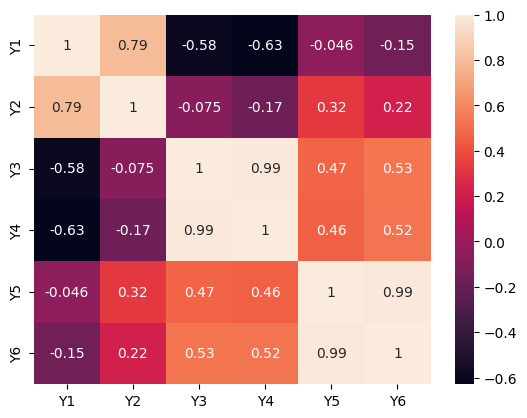

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3','Y4','Y5','Y6']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [ ]:
from sklearn.svm import LinearSVR
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      reg = TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10, scoring='neg_mean_squared_error')
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      Xi = np.hstack([X, y[:, :i]])
      yi = y[:, i]
      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.hstack([X, y[:, :i]]))
    return y


In [ ]:
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(1).fit(X_train, y_train)
#X = np.dtype('float64')



Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.012240852474123

Generation 2 - Current best internal CV score: -0.6635802068444936

Generation 3 - Current best internal CV score: -0.6635802068444936

Generation 4 - Current best internal CV score: -0.6635802068444936

Generation 5 - Current best internal CV score: -0.6635802068444936

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.8, verbosity=0)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.000609883686477448

Generation 2 - Current best internal CV score: -0.000609883686477448

Generation 3 - Current best internal CV score: -0.0006072814362631123

Generation 4 - Current best internal CV score: -0.0006072814362631123

Generation 5 - Current best internal CV score: -0.0006072814362631123

Best pipeline: AdaBoostRegressor(RBFSampler(input_matrix, gamma=0.1), learning_rate=0.001, loss=square, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.26888259722776

Generation 2 - Current best internal CV score: -0.7227090606435416

Generation 3 - Current best internal CV score: -0.7227090606435416

Generation 4 - Current best internal CV score: -0.7227090606435416

Generation 5 - Current best internal CV score: -0.6925323960239906

Best pipeline: AdaBoostRegressor(GradientBoostingRegressor(MaxAbsScaler(input_matrix), alpha=0.95, learning_rate=0.1, loss=huber, max_depth=8, max_features=0.9000000000000001, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.7500000000000001), learning_rate=0.01, loss=square, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.024688185335980453

Generation 2 - Current best internal CV score: -0.024688185335980453

Generation 3 - Current best internal CV score: -0.024688185335980453

Generation 4 - Current best internal CV score: -0.024688185335980453

Generation 5 - Current best internal CV score: -0.024688185335980453

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=1.0, tol=0.01)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -87.2193920636577

Generation 2 - Current best internal CV score: -87.2193920636577

Generation 3 - Current best internal CV score: -87.2193920636577

Generation 4 - Current best internal CV score: -87.2193920636577

Generation 5 - Current best internal CV score: -87.2193920636577

Best pipeline: AdaBoostRegressor(GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=quantile, max_depth=8, max_features=0.9000000000000001, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.7500000000000001), learning_rate=0.01, loss=square, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.003763390622491837

Generation 2 - Current best internal CV score: -0.003763390622491837

Generation 3 - Current best internal CV score: -0.003763390622491837

Generation 4 - Current best internal CV score: -0.003763390622491837

Generation 5 - Current best internal CV score: -0.003763390622491837

Best pipeline: LassoLarsCV(input_matrix, normalize=False)


In [ ]:
Ypred2 = reg2.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2, multioutput='variance_weighted')
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.492522505471383


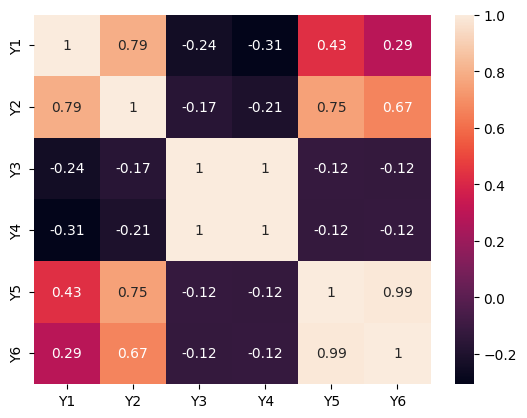

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3','Y4','Y5','Y6']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(y_test, Ypred2))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(y_test, Ypred2)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, Ypred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(y_test,Ypred2)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

RMSE  is 6.766471885100729
MAE  is 3.028184751724286
rmse_per_output: [ 1.46328521  0.46623805  1.97342169  1.35512967 16.29472023  1.05052002]
relative_root_mean_squared_error = Target      0.004445
Target_2    0.001416
Target_3    0.005995
Target_4    0.004117
Target_5    0.049500
Target_6    0.003191
dtype: float64
arrmse = 0.011443983516205819
Percentage arrmse = 1.14%
